In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians

In [2]:
TMA_lon_old = [15.9854, 15.7247, 15.4078, 15.3864, 15.6594, 16.0503, 16.2683, 16.4347, 17.0932, 17.1607, 16.9543, 16.9061, 16.5407, 15.9854];
TMA_lon = [15.9854, 15.7247, 15.4078, 15.3864, 15.6594, 16.0503, 16.2683, 16.4347, 17.35, 16.9543, 16.9061, 16.5407, 15.9854]

TMA_lat_old = [48.7869, 48.7339, 48.2864, 48.1267, 47.8739, 47.5028, 47.2939, 47.2395, 47.7082, 48.0066, 48.5436, 48.7150, 48.8143, 48.7869];
TMA_lat = [48.7869, 48.7339, 48.2864, 48.1267, 47.8739, 47.5028, 47.2939, 47.2395, 47.7082, 48.5436, 48.715, 48.8143, 48.7869]

def plot_TMA_LOWW():
       
    rwy_16_34_lon=[16.58583, 16.59667]
    rwy_16_34_lat=[48.12194, 48.09222]

    rwy_11_29_lon=[16.53333, 16.58167]
    rwy_11_29_lat=[48.12694, 48.115]


    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy_16_34_lon, rwy_16_34_lat, color="red")
    plt.plot(rwy_11_29_lon, rwy_11_29_lat, color="red")
    
    circle_center_lon = 16.45
    circle_center_lat = 48.15

    ax = plt.gca()
    circle = plt.Circle((circle_center_lon, circle_center_lat), 0.03, fill=False, color="red")
    #ax.add_patch(circle)
   

In [3]:
def get_color(cluster):
    if cluster == 1:
        return 'lime'
    if cluster == 2:
        return 'brown'
    if cluster == 3:
        return 'orange'
    if cluster == 4:
        return 'green'
    if cluster == 5:
        return 'cyan'
    if cluster == 6:
        return 'darkviolet'
    if cluster == 7:
        return 'magenta'
    if cluster == 8:
        return 'pink'
    if cluster == 9:
        return 'darkblue'
    if cluster == 10:
        return 'blue'

In [4]:
def plot_legend(number_of_clusters):
    handles = []
    for i in range(0, number_of_clusters):
        cluster_color = get_color(i+1)
        color_patch = mpatches.Patch(color=cluster_color, label='cluster ' + str(i+1))
        handles += [color_patch]
    plt.legend(handles=handles, fontsize=10, loc="best")

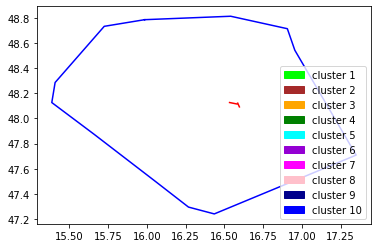

In [5]:
plot_TMA_LOWW()
plot_legend(10)

In [6]:
central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
def plot_horizontal_profile_clustering(df, runway, linewidth, number_of_clusters, clustering_df):
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_LOWW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        
        #flight_states_df = flight_states_df[flight_states_df['altitude']>400] # temp
        
        #print(flight_states_df.tail())
        for seq, row in flight_states_df.groupby(level='sequence'):
        
            lon.append(row['lon'].item())
            lat.append(row['lat'].item())
        
        color = get_color(clustering_df.loc[flight_id]['cluster'])
        plt.plot(lon, lat, color=color, linewidth=linewidth)
        plt.plot(clustering_df.loc[flight_id]['center_lon'], clustering_df.loc[flight_id]['center_lat'], 'ro')
    plot_legend(number_of_clusters)

In [7]:
central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
 
def plot_horizontal_profile_LOWW(df, runway, linewidth, title = ""):
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    plt.title(title)
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_LOWW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        
        #flight_states_df = flight_states_df[flight_states_df['altitude']>400] # temp
        
        #print(flight_states_df.tail())
        for seq, row in flight_states_df.groupby(level='sequence'):
        
            lon.append(row['lon'].item())
            lat.append(row['lat'].item())
        
        plt.plot(lon, lat, color='k', linewidth=linewidth)
        
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        #plt.plot(last_points_lon, last_points_lat, color='red', linewidth=linewidth)
        
        trajectory_point_last = [lat[-1], lon[-1]]

        # 30 seconds before:
        #trajectory_point_before_last = [lat[-30], lon[-30]]
        
        #print(trajectory_point_before_last)
        #print(trajectory_point_last)
        
        #trajectory_azimuth, temp1, temp2 = geod.inv(trajectory_point_before_last[0], trajectory_point_before_last[1],
        #                                            trajectory_point_last[0], trajectory_point_last[1])
        #print(trajectory_azimuth)
    plt.savefig("pictures/problematic_cluster_by_flight/" + title + ".png")

In [8]:
def plot_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['altitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)


In [9]:
def plot_raw_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['rawAltitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [10]:
filename = "../data/LOWW/2019/Dataset/LOWW_dataset_TT.csv"
#filename = "../data/LOWW/2019/Dataset/LOWW_dataset_TT_with_outlier.csv"
dataset_TT_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
dataset_TT_df.set_index(['flight_id', 'sequence'], inplace = True)
number_of_flights = len(dataset_TT_df.groupby(level='flight_id')) 
print(number_of_flights)

1641


In [11]:
filename = "../data/LOWW/2019/Dataset/LOWW_dataset_TT_clusters/LOWW_dataset_TT_cluster6.csv"
dataset_TT_cluster_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
dataset_TT_cluster_df.set_index(['flight_id', 'sequence'], inplace = True)
number_of_flights = len(dataset_TT_cluster_df.groupby(level='flight_id')) 
print(number_of_flights)

87


In [ ]:
day_df = dataset_TT_df[dataset_TT_df['date']==191007]
#print(dataset_TT_df.head())
print(day_df.head())

In [ ]:
#number_of_flights = len(day_df.groupby(level='flight_id')) 
#print(number_of_flights)
#print(day_df.head())

In [ ]:
#for flight_id, flight_df in day_df.groupby(level='flight_id'):
#    plot_horizontal_profile_LOWW(flight_df, 'x', 2, flight_id)

In [ ]:
day_df = dataset_TT_df[dataset_TT_df['date']==191009]
day_df_groupby_flight_id = day_df.groupby(level='flight_id')
number_of_flights = len(day_df_groupby_flight_id) 
print(number_of_flights)
print(day_df_groupby_flight_id.head(2))

In [ ]:
day_df = dataset_TT_df[dataset_TT_df['date']==191013]
#print(day_df.head())

In [ ]:
flight_id_list = []
for flight_id, flight_df in day_df.groupby(level='flight_id'):
    if (flight_df['timestamp'][0] >= 1570950000) and (flight_df['timestamp'][0] < 1570953600): #13.10 7-8
        flight_id_list.append(flight_id)
print(flight_id_list)

In [ ]:
temp_df = pd.DataFrame()
for id in flight_id_list:
    temp_df = temp_df.append(day_df[day_df.index.get_level_values('flight_id') == id])
plot_horizontal_profile_LOWW(temp_df, 'x', 2)

In [ ]:
plot_vertical_profile(temp_df, 100, 2)

In [ ]:
flight_id = "191024ELY2523"
flight_df = temp_df[temp_df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [ ]:
flight_id = "191024ELY2523"
flight_df = dataset_TT_df[dataset_TT_df.index.get_level_values('flight_id') == flight_id]
print(flight_df.head(1))
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [ ]:
#for flight_id, flight_df in dataset_TT_cluster_df.groupby(level='flight_id'):
#    plot_horizontal_profile_LOWW(flight_df, 'x', 2, flight_id)

In [13]:
number_of_clusters = 10
filename = "../data/LOWW/2019/Clustering/LOWW_dataset_TT_TMA_borders_clusters_" + str(number_of_clusters) + ".csv"
dataset_TT_clusters_df = pd.read_csv(filename, sep=' ')
dataset_TT_clusters_df.set_index(['flight_id'], inplace=True)

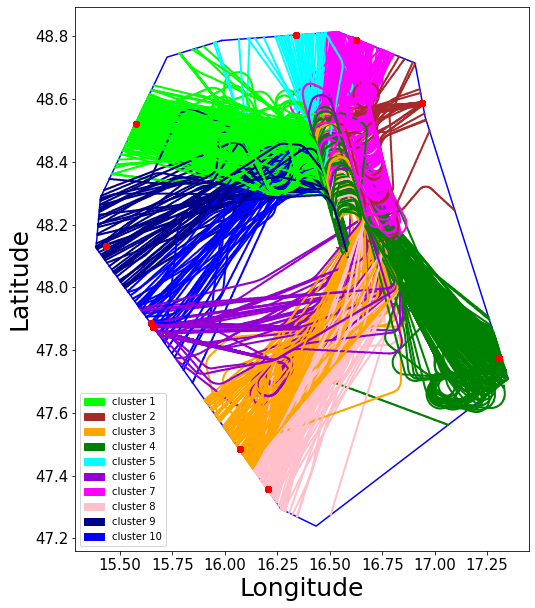

In [14]:
plot_horizontal_profile_clustering(dataset_TT_df, 'x', 2, number_of_clusters, dataset_TT_clusters_df)

In [ ]:
number_of_clusters = 9
filename = "../data/LOWW/2019/Clustering/LOWW_dataset_TT_TMA_borders_clusters_" + str(number_of_clusters) + ".csv"
dataset_TT_clusters_df = pd.read_csv(filename, sep=' ')
dataset_TT_clusters_df.set_index(['flight_id'], inplace=True)

In [ ]:
plot_horizontal_profile_clustering(dataset_TT_df, 'x', 2, number_of_clusters, dataset_TT_clusters_df)

In [ ]:
filename = "../data/LOWW/2019/Dataset/LOWW_dataset_TT_clusters/LOWW_dataset_TT_cluster5_old.csv"
dataset_TT_cluster5_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
dataset_TT_cluster5_df.set_index(['flight_id', 'sequence'], inplace = True)
number_of_flights = len(dataset_TT_cluster5_df.groupby(level='flight_id')) 
print(number_of_flights)

In [ ]:
#filename = "pictures/problematic_cluster_by_flight/LOWW_dataset_TT_problematic_cluster_flight_ids.txt"
#with open(filename, 'w') as filehandle:
#    for flight_id, flight_df in dataset_TT_cluster4_df.groupby(level='flight_id'):
#        plot_horizontal_profile_LOWW(flight_df, 'x', 2, flight_id)
#        filehandle.write('%s\n' % flight_id)

In [ ]:
filename = "pictures/problematic_cluster_by_flight/LOWW_dataset_TT_problematic_cluster_flight_ids.txt"
cluster_flight_ids_set = set(open(filename,'r').read().split('\n'))

In [ ]:
filename = "pictures/problematic_cluster_by_flight/LOWW_dataset_TT_problematic_cluster_flight_ids_subcluster.txt"
sub_cluster1_flight_ids_set = set(open(filename,'r').read().split('\n'))
sub_cluster2_flight_ids_set = cluster_flight_ids_set - sub_cluster1_flight_ids_set
print(len(sub_cluster1_flight_ids_set))
print(len(sub_cluster2_flight_ids_set))
dataset_TT_subcluster1_df = dataset_TT_cluster5_df.loc[sub_cluster1_flight_ids_set]
dataset_TT_subcluster2_df = dataset_TT_cluster5_df.loc[sub_cluster2_flight_ids_set]
plot_horizontal_profile_LOWW(dataset_TT_subcluster2_df, 'x', 2)

In [ ]:
plot_horizontal_profile_LOWW(dataset_TT_cluster4_df, 'x', 2)

In [ ]:
plot_horizontal_profile_LOWW(dataset_TT_df, 'x', 2)

In [ ]:
#plot_horizontal_profile_LOWW(week5_df, 'x', 2)

In [16]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_by_runways/osn_LOWW_states_TMA_2019_10_week1_rwy_11.csv"
week1_rwy_11_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy_11_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_by_runways/osn_LOWW_states_TMA_2019_10_week1_rwy_16.csv"
week1_rwy_16_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy_16_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_by_runways/osn_LOWW_states_TMA_2019_10_week1_rwy_29.csv"
week1_rwy_29_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy_29_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_by_runways/osn_LOWW_states_TMA_2019_10_week1_rwy_34.csv"
week1_rwy_34_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy_34_df.set_index(['flight_id', 'sequence'], inplace = True)

In [17]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week2_by_runways/osn_LOWW_states_TMA_2019_10_week2_rwy_11.csv"
week2_rwy_11_df= pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy_11_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week2_by_runways/osn_LOWW_states_TMA_2019_10_week2_rwy_16.csv"
week2_rwy_16_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy_16_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week2_by_runways/osn_LOWW_states_TMA_2019_10_week2_rwy_29.csv"
week2_rwy_29_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy_29_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week2_by_runways/osn_LOWW_states_TMA_2019_10_week2_rwy_34.csv"
week2_rwy_34_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy_34_df.set_index(['flight_id', 'sequence'], inplace = True)

In [18]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week3_by_runways/osn_LOWW_states_TMA_2019_10_week3_rwy_11.csv"
week3_rwy_11_df= pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy_11_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week3_by_runways/osn_LOWW_states_TMA_2019_10_week3_rwy_16.csv"
week3_rwy_16_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy_16_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week3_by_runways/osn_LOWW_states_TMA_2019_10_week3_rwy_29.csv"
week3_rwy_29_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy_29_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week3_by_runways/osn_LOWW_states_TMA_2019_10_week3_rwy_34.csv"
week3_rwy_34_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy_34_df.set_index(['flight_id', 'sequence'], inplace = True)

In [19]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week4_by_runways/osn_LOWW_states_TMA_2019_10_week4_rwy_11.csv"
week4_rwy_11_df= pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy_11_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week4_by_runways/osn_LOWW_states_TMA_2019_10_week4_rwy_16.csv"
week4_rwy_16_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy_16_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week4_by_runways/osn_LOWW_states_TMA_2019_10_week4_rwy_29.csv"
week4_rwy_29_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy_29_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week4_by_runways/osn_LOWW_states_TMA_2019_10_week4_rwy_34.csv"
week4_rwy_34_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy_34_df.set_index(['flight_id', 'sequence'], inplace = True)

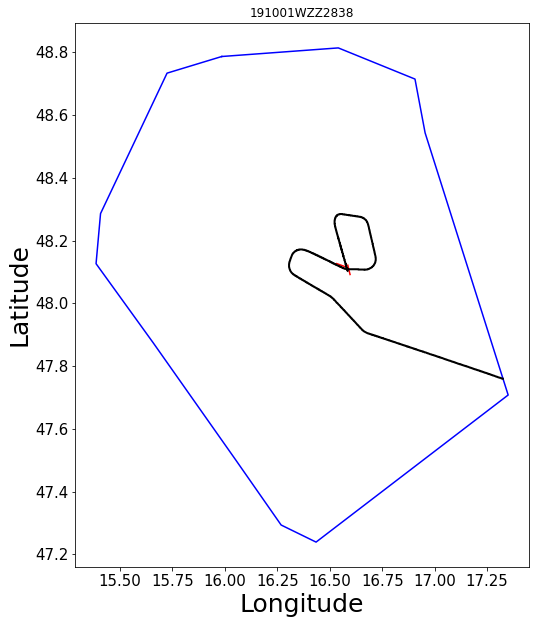

In [20]:
df = week1_rwy_16_df
flight_id = '191001WZZ2838'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [ ]:
df = week1_rwy_34_df
flight_id = '191006LDM5TD'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [ ]:
df = week3_rwy_16_df 
flight_id = '191015LDM601J'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [ ]:
df = week2_rwy_16_df
flight_id = '191009EWG9788'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [ ]:
df = week3_rwy_16_df
flight_id = '191015AUA76G'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [15]:
df = week3_rwy_16_df
flight_id = '191017AUA52H'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

NameError: name 'week3_rwy_16_df' is not defined

In [ ]:
df = week3_rwy_11_df
flight_df = df[df.index.get_level_values('flight_id') == '191015AUA128'] # 2 attemps to land
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [ ]:
 #for flight_id, flight_id_group in week4_rwy_11_df.groupby(level='flight_id'):
 #       plot_horizontal_profile_LOWW(flight_id_group, "x", 2, flight_id)
        #

In [ ]:
plot_horizontal_profile_LOWW(week1_rwy_11_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week1_rwy_16_df, "x", 2)
#check

In [ ]:
plot_horizontal_profile_LOWW(week1_rwy_29_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week1_rwy_34_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week2_rwy_11_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week2_rwy_16_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week2_rwy_29_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week2_rwy_34_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week3_rwy_11_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week3_rwy_16_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week3_rwy_29_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week3_rwy_34_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week4_rwy_11_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week4_rwy_16_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week4_rwy_29_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week4_rwy_34_df, "x", 2)

In [ ]:
#plot_vertical_profile(df, 0, 2)